**Prominence**:

- The prominence of a peak measures how much the peak stands out due to its intrinsic height and its location relative to other peaks.
- It is the height of the peak’s summit relative to the highest contour line surrounding it and not containing any higher summit.
- Peaks with a prominence smaller than a threshold will be ignored.
- In simple terms, it is a measure of how a peak is distinguishable from its neighboring points (both on the left and the right side). Higher prominence value means that the peak is more distinguishable.

**Width**:

- The width of a peak is the horizontal distance between its left and right edges.
- The edges are the first points where the signal drops to half its peak height.
- The `width` parameter in `find_peaks` can be used to specify a minimum and/or maximum width for the detected peaks. It is given as a tuple `(min_width, max_width)`.
- Peaks with widths smaller than `min_width` or larger than `max_width` will be ignored.

In the `find_peaks` function from `scipy.signal`, these parameters are used to filter the detected peaks. Only the peaks with prominence higher than the specified `prominence` and width within the specified `width` range will be detected.


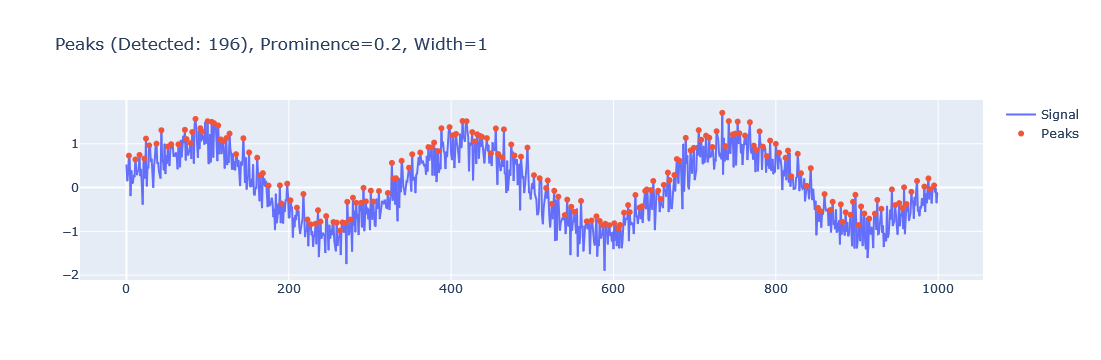

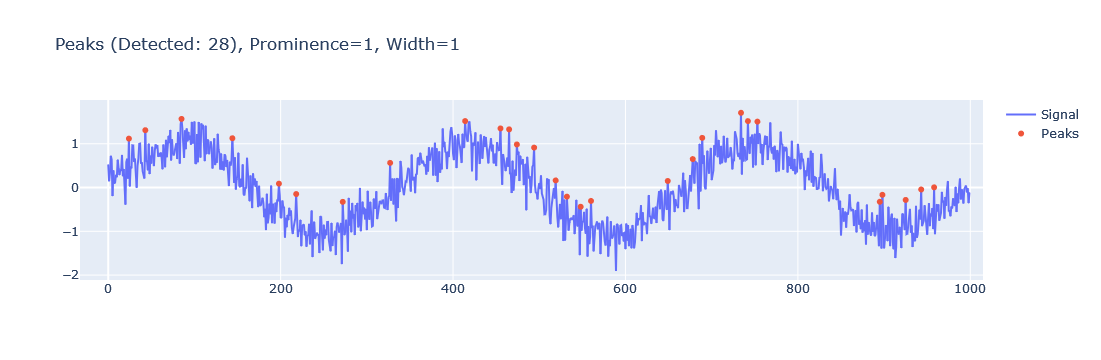

In [8]:
import numpy as np
import plotly.graph_objects as go
from scipy.signal import find_peaks

# Generate example signal
np.random.seed(0)
x = np.linspace(0, 6 * np.pi, 1000)  # 1000 points between 0 and 6*pi
signal = np.sin(x) + 0.3 * np.random.normal(size=x.size)

# Define function to plot signal and detected peaks using plotly
def plot_peaks_plotly(signal, peaks, prominence=None, width=None):
    title = f'Peaks (Detected: {len(peaks)})'  # Added count of detected peaks
    if prominence is not None:
        title += f', Prominence={prominence}'
    if width is not None:
        title += f', Width={width}'
    
    fig = go.Figure()
    fig.add_trace(go.Scatter(y=signal, mode='lines', name='Signal'))
    fig.add_trace(go.Scatter(x=peaks, y=signal[peaks], mode='markers', name='Peaks'))
    fig.update_layout(title=title)
    fig.show()

# Detect peaks with different prominence and width settings
prominence1, width1 = 0.2, 1
prominence2, width2 = 1, 1

peaks1, _ = find_peaks(signal, prominence=prominence1, width=width1)
peaks2, _ = find_peaks(signal, prominence=prominence2, width=width2)

# Plot results using plotly
plot_peaks_plotly(signal, peaks1, prominence=prominence1, width=width1)
plot_peaks_plotly(signal, peaks2, prominence=prominence2, width=width2)
